<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Árvores de Decisão: Confiabilidade e Generalização

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Módulo de Análise Exploratória
import aed

## Importação da base de dados

In [2]:
df_rh = pd.read_csv('base_funcionarios_v4.csv', 
                    sep=',',
                    index_col=0)
df_rh.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
0,5517.4,3,3,9.777079,Não
1,6399.9,4,6,3.765998,Não
2,6206.7,6,3,7.926264,Não
3,6060.6,4,5,2.233497,Não
4,6122.7,2,9,26.821842,Não


## Preparação dos Dados

### Missing Values

In [3]:
df_rh.isnull().sum()

Salario               0
Anos_Educ_Superior    0
Tempo_Empresa         0
Tempo_de_Carreira     0
Possui_Skill_Dados    0
dtype: int64

### Duplicações

In [4]:
df_rh.duplicated().sum()

0

### Tipos de Variáveis

In [5]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
 3   Tempo_de_Carreira   46 non-null     float64
 4   Possui_Skill_Dados  46 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.2+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

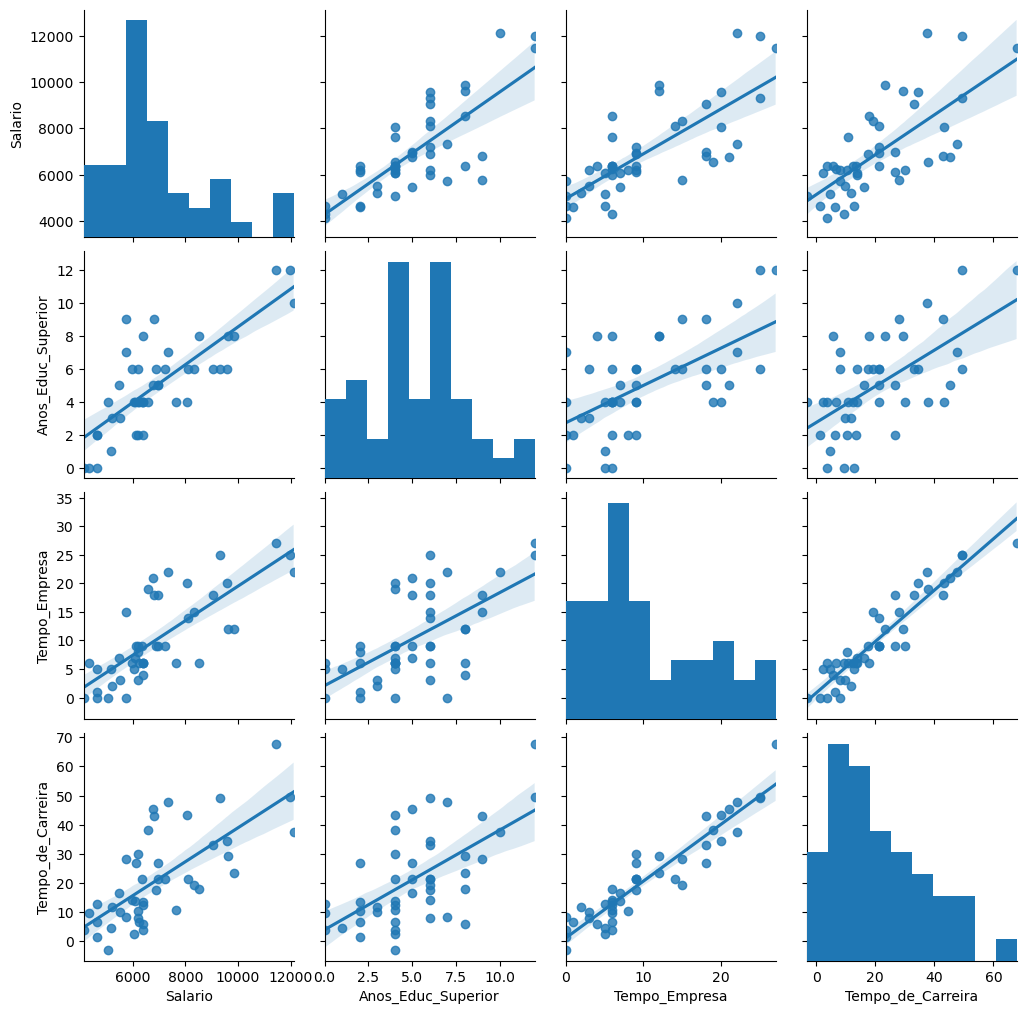

In [6]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df_rh, kind='reg');

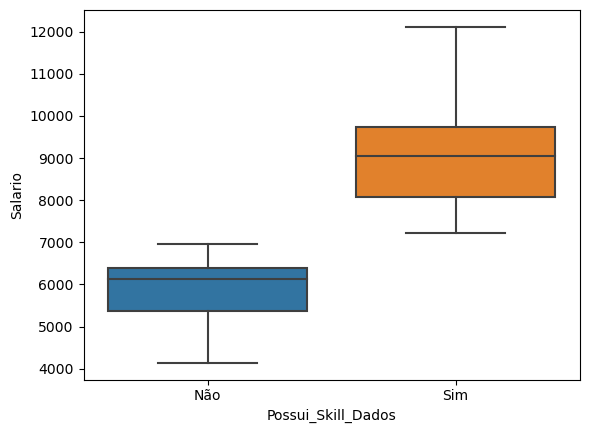

In [7]:
sns.boxplot(x=df_rh['Possui_Skill_Dados'],
            y=df_rh['Salario']);

### Relatórios Pandas Profiling e SweetViz

In [8]:
perfil_pp, perfil_sv = aed.gera_relatorios_aed(df=df_rh,
                                               target_feat='Salario')

:TARGET::                          |███▌                 | [ 17%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Desenvolvimento do Modelo: Árvores de Decisão
Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de *Machine Learning*.

### Definição do *Target* e das *Features*

In [9]:
# Criação das variáveis dummies
df_rh_modelo = pd.get_dummies(df_rh)
df_rh_modelo.drop('Possui_Skill_Dados_Não', axis=1, inplace=True)
df_rh_modelo.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados_Sim
0,5517.4,3,3,9.777079,0
1,6399.9,4,6,3.765998,0
2,6206.7,6,3,7.926264,0
3,6060.6,4,5,2.233497,0
4,6122.7,2,9,26.821842,0


In [10]:
# Target (variável resposta)
y = df_rh_modelo['Salario']

# Features (variáveis explicativas)
x = df_rh_modelo.drop('Salario', axis = 1)

In [11]:
x.head()

,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados_Sim
0,3,3,9.777079,0
1,4,6,3.765998,0
2,6,3,7.926264,0
3,4,5,2.233497,0
4,2,9,26.821842,0


### Divisão das bases em Treino e Teste

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [13]:
x_train.shape

(32, 4)

In [14]:
x_test.shape

(14, 4)

### Treinamento da Árvore de Decisão

In [15]:
modelo_salario = DecisionTreeRegressor(max_depth=2, 
                                       min_samples_leaf=5,
                                       random_state=42)
modelo_salario.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=42)

### Avaliação do modelo treinado

#### Interpretação do Modelo

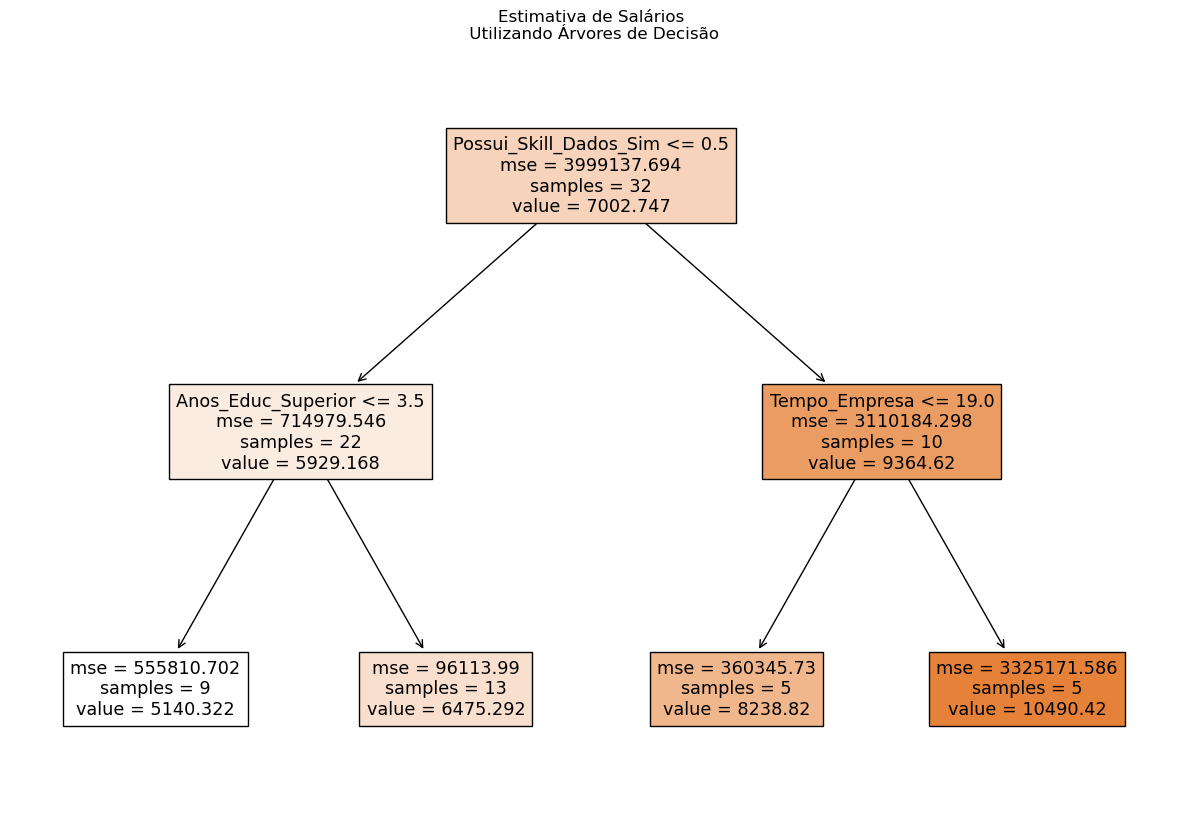

In [17]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_salario,
               feature_names=features,
               filled=True);
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão");

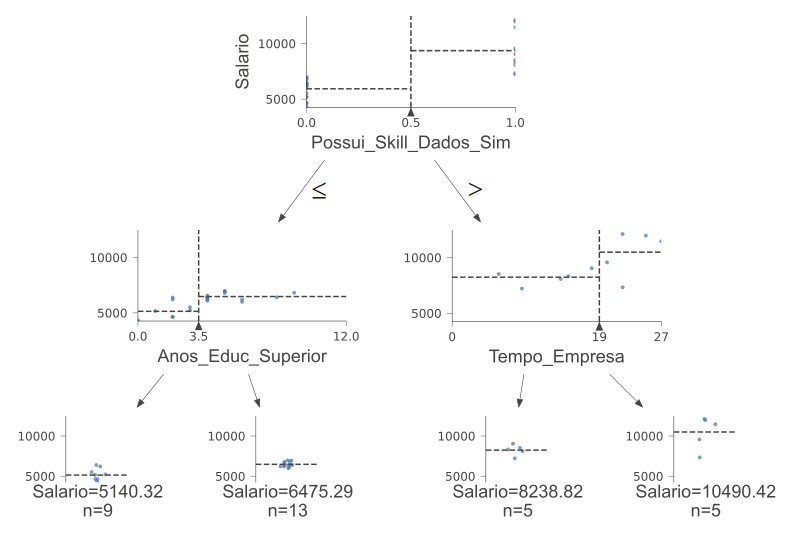

In [18]:
viz = dtreeviz(tree_model=modelo_salario, 
               x_data=x_train, y_data=y_train, 
               target_name='Salario',
               feature_names=features,
               scale=2.0)
viz

#### Desempenho do Modelo: Treino

In [19]:
# Cálculo do desempenho do modelo: R²
y_pred_train = modelo_salario.predict(x_train)
print('R² Treino: ', round(r2_score(y_train, 
                                    y_pred_train), 2))

R² Treino:  0.81


#### Desempenho do Modelo: Teste

In [20]:
# Cálculo do desempenho do modelo: R²
y_pred_test = modelo_salario.predict(x_test)
print('R² Teste: ', round(r2_score(y_test, 
                                   y_pred_test), 2))

R² Teste:  0.54


### Criação de uma função para simplificar o processo

In [21]:
def treina_arvore_regressao(x_train, y_train, x_test, y_test, max_d, min_s):

    modelo = DecisionTreeRegressor(max_depth=max_d,
                                   min_samples_leaf=min_s,
                                   random_state=42)
    modelo.fit(x_train, y_train)
    
    y_pred_train = modelo.predict(x_train)
    y_pred_test = modelo.predict(x_test)
    
    # Cálculo do Desempenho
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    return modelo, (r2_train, r2_test)

In [22]:
treina_arvore_regressao(x_train, y_train, x_test, y_test, 2, 5)

(DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=42),
 (0.8071508890574679, 0.544392089094009))

#### Exploração dos hiperparâmetros: Árvore de Decisão

In [23]:
max_d = list()
min_s = list()
r2_train = list()
r2_test = list()

for d in range(1, 5):
    for s in range(1, 31):
        max_d.append(d)
        min_s.append(s)
        modelo, r2 = treina_arvore_regressao(x_train, y_train, 
                                     x_test, y_test, 
                                     d, s)
        r2_train.append(r2[0])
        r2_test.append(r2[1])
        
busca_ad = pd.DataFrame(list(zip(max_d, min_s, r2_train, r2_test)), 
                        columns=['Max Depth', 'Min Samples Leaf', 
                                 'R2 Train', 'R2 Test'])
busca_ad['Diferença'] = busca_ad['R2 Test'] - busca_ad['R2 Train']
busca_ad

,Max Depth,Min Samples Leaf,R2 Train,R2 Test,Diferença
0,1,1,0.634051,0.777422,0.143371
1,1,2,0.634051,0.777422,0.143371
2,1,3,0.634051,0.777422,0.143371
3,1,4,0.634051,0.777422,0.143371
4,1,5,0.634051,0.777422,0.143371
...,...,...,...,...,...
115,4,26,0.000000,-0.004246,-0.004246
116,4,27,0.000000,-0.004246,-0.004246
117,4,28,0.000000,-0.004246,-0.004246
118,4,29,0.000000,-0.004246,-0.004246


In [24]:
def analise_hiperparametro(hp):
    sns.set()

    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    fig.suptitle(t='Análise do Hiperparâmetro: '+hp, fontsize=12)

    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad['R2 Train'])
    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad['R2 Test'])
    axes[0].legend(labels=['Treino', 'Teste'])

    sns.lineplot(ax=axes[1], x=busca_ad[hp], y=busca_ad['Diferença'])

    fig.tight_layout()    

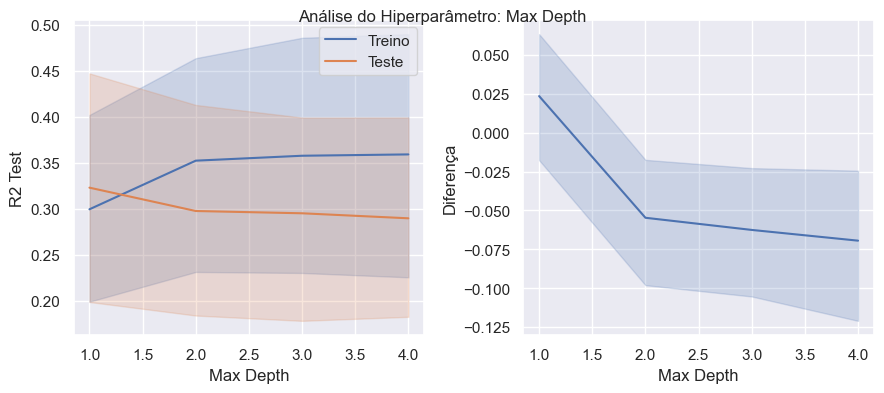

In [25]:
analise_hiperparametro('Max Depth')

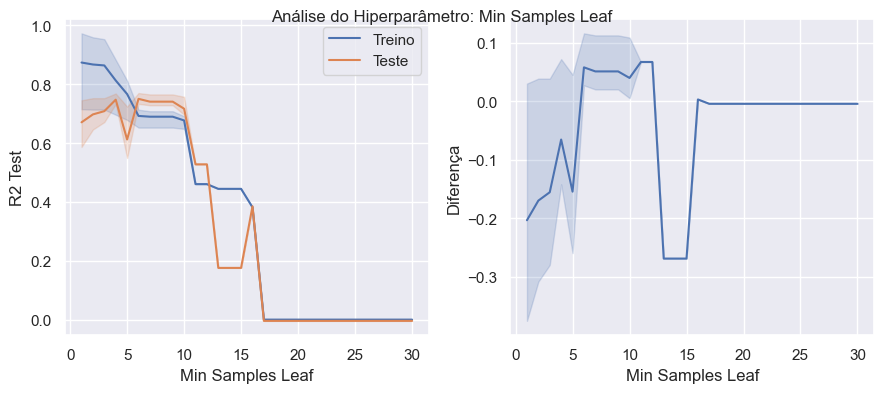

In [26]:
analise_hiperparametro('Min Samples Leaf')

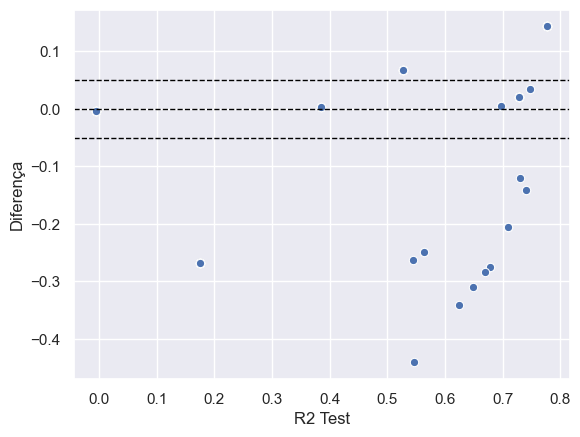

In [27]:
desemp_graf = sns.scatterplot(busca_ad['R2 Test'], 
                              busca_ad['Diferença'])
ax1 = desemp_graf.axes
ax1.axhline( 0, color='black', ls='--', linewidth = 1)
ax1.axhline(-0.05, color='black', ls='--', linewidth = 1)
ax1.axhline( 0.05, color='black', ls='--', linewidth = 1)
plt.show()

In [28]:
busca_ad.loc[
    (busca_ad['Diferença'] > -0.05) &
    (busca_ad['Diferença'] <  0.05) &
    (busca_ad['R2 Test'] > 0.7)
    ].sort_values(by=['Diferença', 'R2 Test', 'Min Samples Leaf', 'Max Depth'],
                  ascending=[True, False, False, True])

,Max Depth,Min Samples Leaf,R2 Train,R2 Test,Diferença
38,2,9,0.708112,0.728457,0.020345
68,3,9,0.708112,0.728457,0.020345
98,4,9,0.708112,0.728457,0.020345
37,2,8,0.708112,0.728457,0.020345
67,3,8,0.708112,0.728457,0.020345
97,4,8,0.708112,0.728457,0.020345
36,2,7,0.708112,0.728457,0.020345
66,3,7,0.708112,0.728457,0.020345
96,4,7,0.708112,0.728457,0.020345
35,2,6,0.708112,0.728457,0.020345


##### Modelo Analisado 1: Max Depth=2, Min Samples Leaf=9

In [29]:
modelo_d2s9, r2_dss9 = treina_arvore_regressao(x_train, y_train, x_test, y_test, 2, 9)
r2_dss9

(0.7081119104496643, 0.728457177894077)

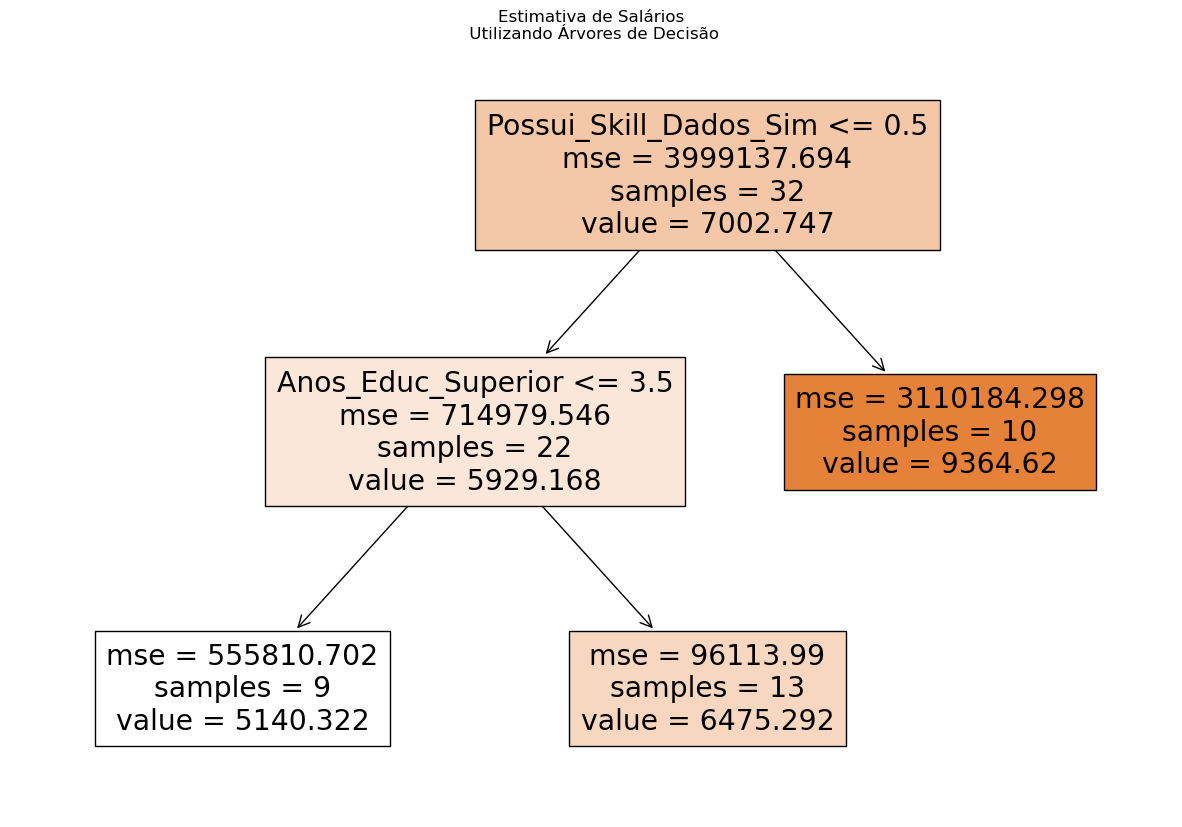

In [31]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_d2s9,
               feature_names=features,
               filled=True);
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão");

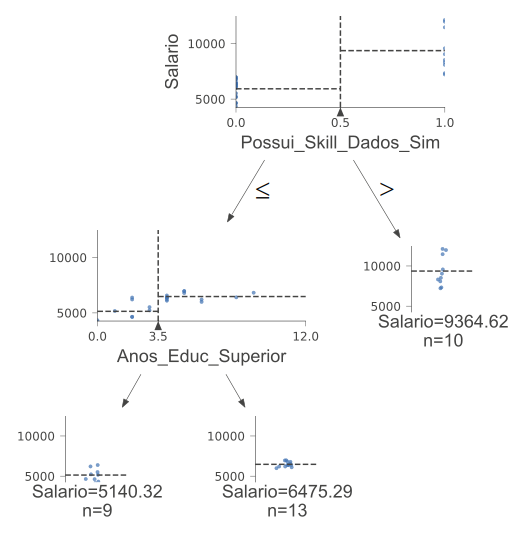

In [32]:
viz = dtreeviz(tree_model=modelo_d2s9, 
               x_data=x_train, y_data=y_train, 
               target_name='Salario',
               feature_names=features,
               scale=2.0)
viz

##### Modelo Analisado 2: Max Depth=3, Min Samples Leaf=6

In [33]:
modelo_d3s6, r2_d3s6 = treina_arvore_regressao(x_train, y_train, x_test, y_test, 3, 6)
r2_d3s6

(0.7132799002238015, 0.7475024656425617)

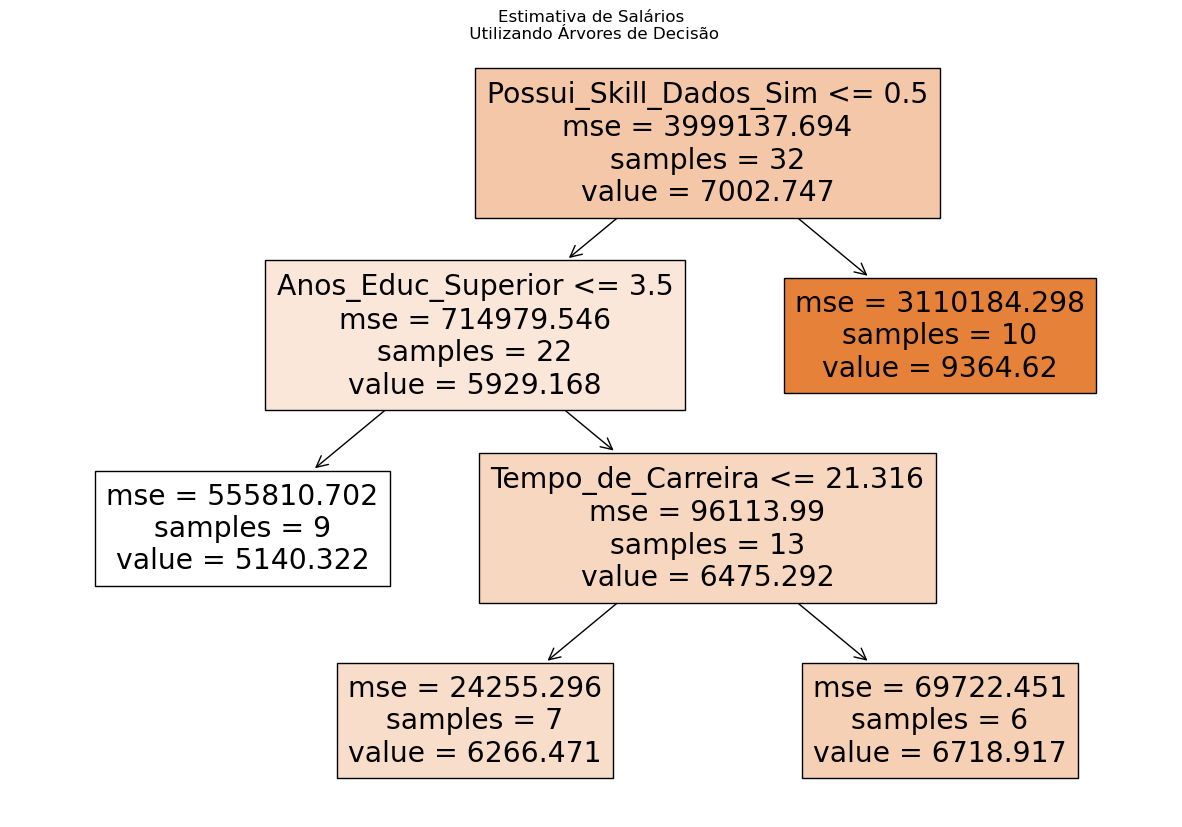

In [35]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_d3s6,
               feature_names=features,
               filled=True);
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão");

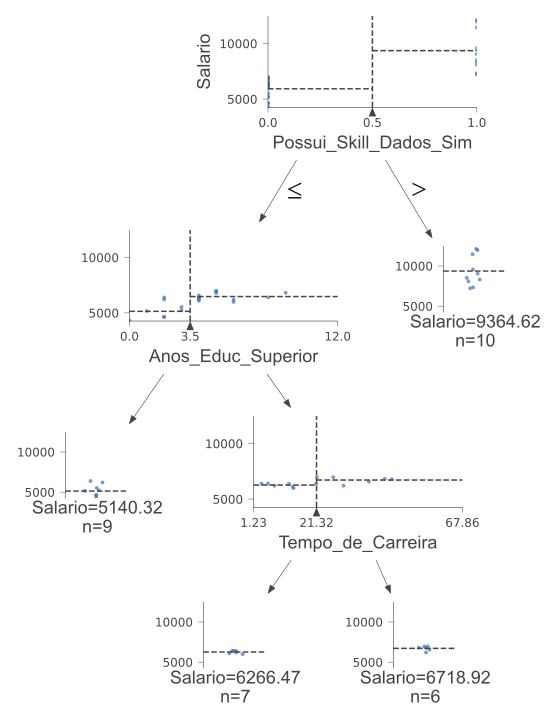

In [36]:
viz = dtreeviz(tree_model=modelo_d3s6, 
               x_data=x_train, y_data=y_train, 
               target_name='Salario',
               feature_names=features,
               scale=2.0)
viz